<a href="https://colab.research.google.com/github/YazCodes/Sentiment-Analysis-Twitter/blob/main/SentimentAnalysisTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import TweetTokenizer #text preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms for the experiment 
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import matplotlib.pyplot as plt 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#uploading the dataset
# read csv file into a dataframe
df = pd.read_csv('/content/train.csv')

# find out the number of entires 
print(f'Number of entries: {len(df)}')
df.head()

Number of entries: 16363


,Id,Text,Sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


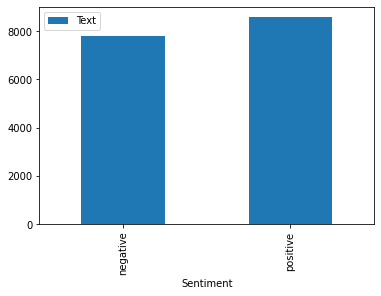

In [3]:
#Analysising the data - Compare the amount of postitive and negative tweets 
temp_df = df[['Text', 'Sentiment']] #Using the text and sentiment colomn to plot the graph
temp_df = temp_df.groupby('Sentiment').count() #count the number of diffrent elements in the sentiment column 
temp_df.plot.bar() #plot the bar chart 

In [8]:
#Data cleaning  - Important step as the ML model and data processing cannot start if the dataset contains missing values

df.isnull().values.any() #This shows if there are any missing values in the dataset. True = yes false = No

df = df.dropna() #drop any rows with missing values - just in case 

print(f'Number of entries: {len(df)}') #check if the number of entries have changed

Number of entries: 16363


**The results of inital data analysis** 
The dataset contains 16363 entires consisting of three columns. 


1.   ID - The Id number of each text 
2.   Text - The tweet in text format 
3.   Sentiment - Indicating if the text is postive or negative


The bar charts show the data set contains under 8000 negative tweets and about 8000 postive tweets. So nearly an equal split. 

During data cleaning there was no missing values

In [11]:
#Data preprocessing - This transforms the raw data into an understantable format 

#Tokenisation - This is the process in NLP of splitting up text into smaller individual words called Tokens
#Tokenisation is important as large amounts of text data needs to be broken down into smaller units of text so our ML models can understand. 

#Text preprocessing - cleaning and preparing text data
#Selecting a tokenizer model. -  word_tokenize - Tokenizer for normal text

#TweetTokenizer - Tokenizer for tweets - As the dataset contains text in the form of tweets we will be using this . 

list_tokenised_text = []  #Creat an empty list

for text in df['Text']: # Converting text to tokens by iterating through each row in 'Text' columm. 
  tokenized_text = TweetTokenizer(text)
  list_tokenised_text.append(tokenized_text) #Adding the tokenzie text inside the empty list 

print(list_tokenised_text[:2]) #the list containing the tokenzied text 

#After tokenizing we need to put them back into sentences 

list_tokenised_sentences = []
for tokens in list_tokenised_text:
  text = ' '.join(tokens)
  list_tokenised_sentences.append(text)

# adding a  new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences



[<nltk.tokenize.casual.TweetTokenizer object at 0x7f0685e03710>, <nltk.tokenize.casual.TweetTokenizer object at 0x7f0685e03748>]


TypeError: ignored